In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

In [2]:
def read_file(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()
        type_info = lines[0].split(",")[0]
        times = [int(line.strip()) for line in lines[1:]]
        return type_info, times

In [3]:
res_df = pd.DataFrame(columns=["runtime", "time"])

In [4]:
result_files = glob.glob("../../start/start-io.containerd*")

for result_file in result_files:
    type_info, times = read_file(result_file)
    res_df = pd.concat([res_df, pd.DataFrame({"runtime": type_info, "time": times})], ignore_index=True)

res_df

,runtime,time
0,io.containerd.kata.v2-kata2-cloudhypervisor,746
1,io.containerd.kata.v2-kata2-cloudhypervisor,787
2,io.containerd.kata.v2-kata2-cloudhypervisor,791
3,io.containerd.kata.v2-kata2-cloudhypervisor,816
4,io.containerd.kata.v2-kata2-cloudhypervisor,708
...,...,...
895,io.containerd.runsc.v1-systrap,603
896,io.containerd.runsc.v1-systrap,559
897,io.containerd.runsc.v1-systrap,571
898,io.containerd.runsc.v1-systrap,620


In [5]:
res_df.describe()

,runtime,time
count,900,900
unique,9,536
top,io.containerd.kata.v2-kata2-cloudhypervisor,756
freq,100,7


In [6]:
average_time_per_type = res_df.groupby("runtime")["time"].mean().reset_index().sort_values(by="time")
median_time_per_type = res_df.groupby("runtime")["time"].median().reset_index().sort_values(by="time")
min_time_per_type = res_df.groupby("runtime")["time"].min().reset_index().sort_values(by="time")
max_time_per_type = res_df.groupby("runtime")["time"].max().reset_index().sort_values(by="time")
std_time_per_type = res_df.groupby("runtime")["time"].std().reset_index().sort_values(by="time")

In [7]:
res_df["friendly_runtime"] = res_df["runtime"] \
    .str.replace("io.containerd.runc.v2",                       "runc") \
    .str.replace("io.containerd.kata.v2-kata2-qemu",            "Kata (2.x, QEMU)") \
    .str.replace("io.containerd.kata.v2-kata3-qemu",            "Kata (3.x, QEMU)") \
    .str.replace("io.containerd.kata.v2-kata2-cloudhypervisor", "Kata (2.x, Cloud Hypervisor)") \
    .str.replace("io.containerd.kata.v2-kata3-cloudhypervisor", "Kata (3.x, Cloud Hypervisor)") \
    .str.replace("io.containerd.kata.v2-kata2-firecracker",     "Kata (2.x, Firecracker)") \
    .str.replace("io.containerd.kata.v2-kata3-dragonball",      "Kata (3.x, Dragonball)") \
    .str.replace("io.containerd.runsc.v1-kvm",                  "gVisor (KVM)") \
    .str.replace("io.containerd.runsc.v1-systrap",              "gVisor (systrap)")

res_df

,runtime,time,friendly_runtime
0,io.containerd.kata.v2-kata2-cloudhypervisor,746,"Kata (2.x, Cloud Hypervisor)"
1,io.containerd.kata.v2-kata2-cloudhypervisor,787,"Kata (2.x, Cloud Hypervisor)"
2,io.containerd.kata.v2-kata2-cloudhypervisor,791,"Kata (2.x, Cloud Hypervisor)"
3,io.containerd.kata.v2-kata2-cloudhypervisor,816,"Kata (2.x, Cloud Hypervisor)"
4,io.containerd.kata.v2-kata2-cloudhypervisor,708,"Kata (2.x, Cloud Hypervisor)"
...,...,...,...
895,io.containerd.runsc.v1-systrap,603,gVisor (systrap)
896,io.containerd.runsc.v1-systrap,559,gVisor (systrap)
897,io.containerd.runsc.v1-systrap,571,gVisor (systrap)
898,io.containerd.runsc.v1-systrap,620,gVisor (systrap)


[Text(0.5, 0, 'Start time (ms)'), Text(0, 0.5, '')]

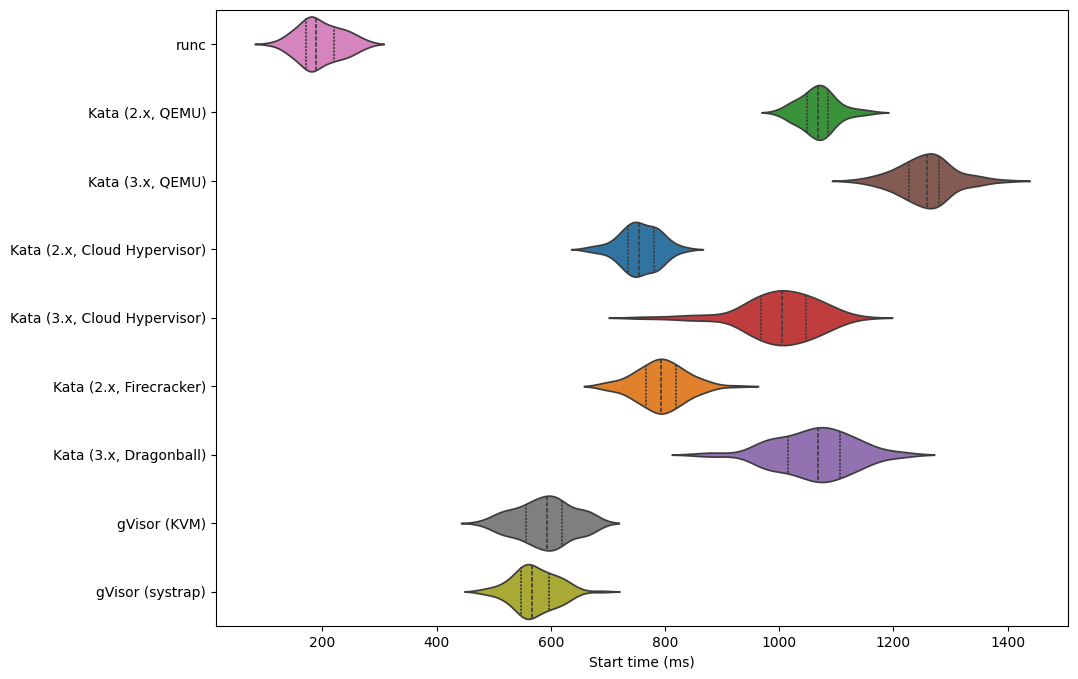

In [8]:
plt.figure(figsize=(11, 8))
ax = sns.violinplot(data=res_df, hue="friendly_runtime", x="time", y="friendly_runtime", inner="quart", order=[
    "runc",
    "Kata (2.x, QEMU)",
    "Kata (3.x, QEMU)",
    "Kata (2.x, Cloud Hypervisor)",
    "Kata (3.x, Cloud Hypervisor)",
    "Kata (2.x, Firecracker)",
    "Kata (3.x, Dragonball)",
    "gVisor (KVM)",
    "gVisor (systrap)",
])
ax.set(xlabel="Start time (ms)", ylabel="")

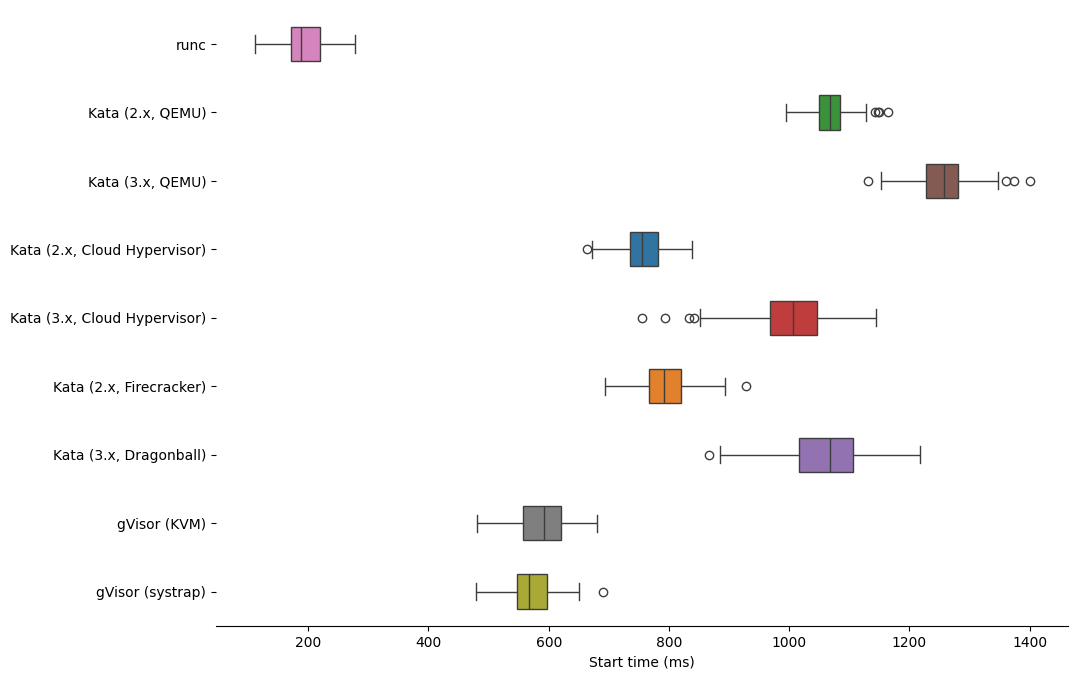

In [9]:
plt.figure(figsize=(11, 8))
ax = sns.boxplot(data=res_df, x="time", y="friendly_runtime", hue="friendly_runtime", width=0.5, order=[
    "runc",
    "Kata (2.x, QEMU)",
    "Kata (3.x, QEMU)",
    "Kata (2.x, Cloud Hypervisor)",
    "Kata (3.x, Cloud Hypervisor)",
    "Kata (2.x, Firecracker)",
    "Kata (3.x, Dragonball)",
    "gVisor (KVM)",
    "gVisor (systrap)",
])
# sns.stripplot(data=res_df, x="time", y="runtime", size=3, color=".4")

ax.set(xlabel="Start time (ms)", ylabel="")
sns.despine(left=True)

In [10]:
# Compare gVisor systrap with kvm

gvisor_df = res_df.loc[res_df["runtime"].str.contains("runsc")].reset_index(drop=True)
gvisor_df["platform"] = gvisor_df["runtime"].apply(lambda runtime: "KVM" if "kvm" in runtime else "systrap")
gvisor_df["runtime"] = "io.containerd.runsc.v1"
gvisor_df

,runtime,time,friendly_runtime,platform
0,io.containerd.runsc.v1,574,gVisor (KVM),KVM
1,io.containerd.runsc.v1,607,gVisor (KVM),KVM
2,io.containerd.runsc.v1,522,gVisor (KVM),KVM
3,io.containerd.runsc.v1,598,gVisor (KVM),KVM
4,io.containerd.runsc.v1,598,gVisor (KVM),KVM
...,...,...,...,...
195,io.containerd.runsc.v1,603,gVisor (systrap),systrap
196,io.containerd.runsc.v1,559,gVisor (systrap),systrap
197,io.containerd.runsc.v1,571,gVisor (systrap),systrap
198,io.containerd.runsc.v1,620,gVisor (systrap),systrap


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


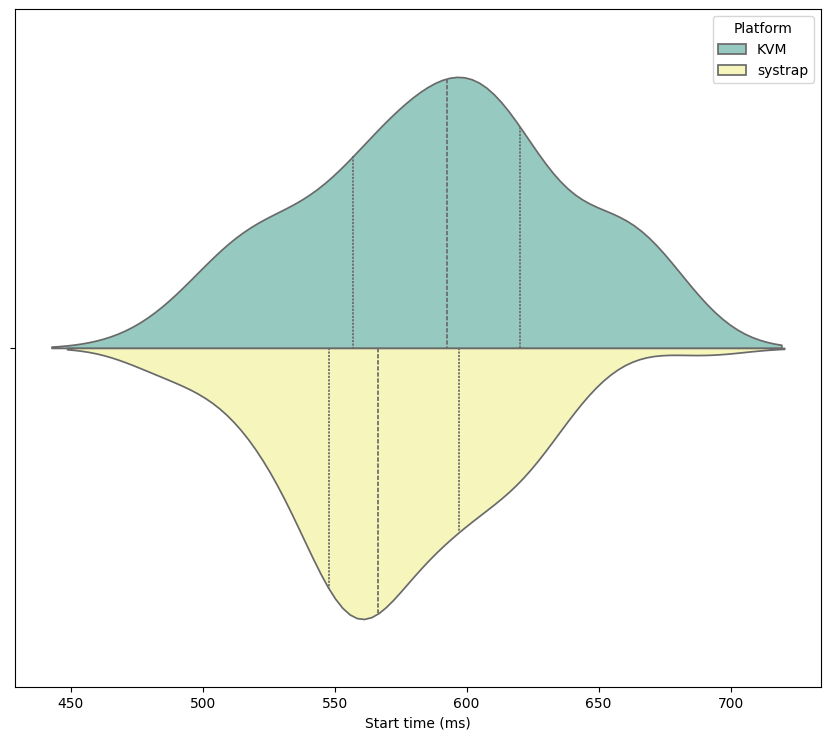

In [11]:
plt.figure(figsize=(10.4, 8.8))
ax = sns.violinplot(data=gvisor_df, palette="Set3", hue="platform", x="time", split=True, inner="quart")
ax.set(xlabel="Start time (ms)", ylabel="")
ax.legend_.set_title("Platform")

plt.savefig("start-gvisor_kvm_systrap.eps", format="eps", dpi=1200, bbox_inches="tight")

In [12]:
# Compare kata versions and hypervisors

kata_df = res_df.loc[res_df["runtime"].str.contains("kata")].reset_index(drop=True)
kata_df["architecture"] = kata_df["runtime"].apply(lambda runtime: "2.x (Go)" if "kata2" in runtime else "3.x (Rust)")
kata_df["hypervisor"] = kata_df["runtime"].apply(lambda runtime: ("QEMU" if "qemu" in runtime else ("Firecracker" if "firecracker" in runtime else ("Dragonball" if "dragonball" in runtime else "Cloud Hypervisor")))
)
kata_df["runtime"] = "io.containerd.kata.v2"
kata_df

,runtime,time,friendly_runtime,architecture,hypervisor
0,io.containerd.kata.v2,746,"Kata (2.x, Cloud Hypervisor)",2.x (Go),Cloud Hypervisor
1,io.containerd.kata.v2,787,"Kata (2.x, Cloud Hypervisor)",2.x (Go),Cloud Hypervisor
2,io.containerd.kata.v2,791,"Kata (2.x, Cloud Hypervisor)",2.x (Go),Cloud Hypervisor
3,io.containerd.kata.v2,816,"Kata (2.x, Cloud Hypervisor)",2.x (Go),Cloud Hypervisor
4,io.containerd.kata.v2,708,"Kata (2.x, Cloud Hypervisor)",2.x (Go),Cloud Hypervisor
...,...,...,...,...,...
595,io.containerd.kata.v2,1211,"Kata (3.x, QEMU)",3.x (Rust),QEMU
596,io.containerd.kata.v2,1346,"Kata (3.x, QEMU)",3.x (Rust),QEMU
597,io.containerd.kata.v2,1173,"Kata (3.x, QEMU)",3.x (Rust),QEMU
598,io.containerd.kata.v2,1218,"Kata (3.x, QEMU)",3.x (Rust),QEMU


[Text(0.5, 0, 'Start time (ms)'), Text(0, 0.5, '')]

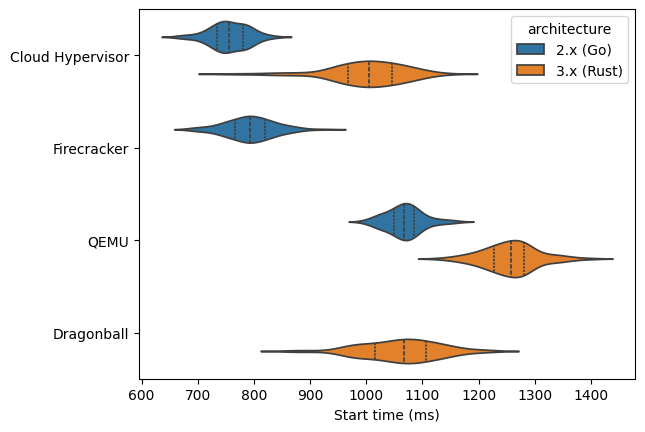

In [13]:
ax = sns.violinplot(data=kata_df, hue="architecture", x="time", y="hypervisor", inner="quart")
ax.set(xlabel="Start time (ms)", ylabel="")

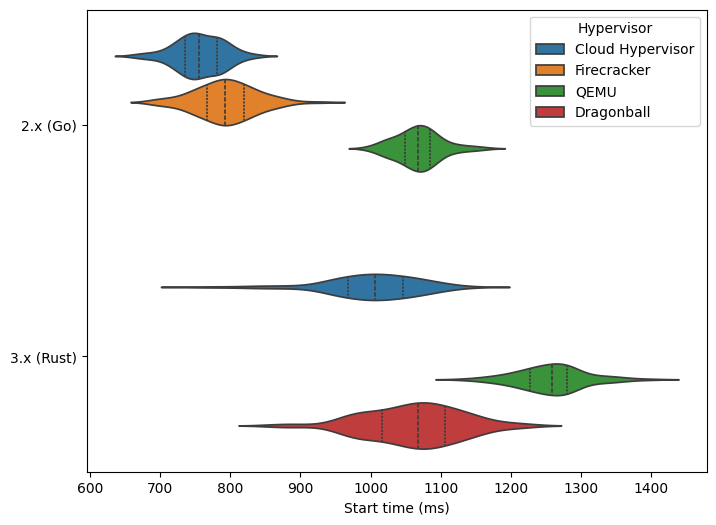

In [14]:
plt.figure(figsize=(8, 6))
ax = sns.violinplot(data=kata_df, hue="hypervisor", x="time", y="architecture", inner="quart")
ax.set(xlabel="Start time (ms)", ylabel="")
ax.legend_.set_title("Hypervisor")

<Axes: xlabel='hypervisor', ylabel='time'>

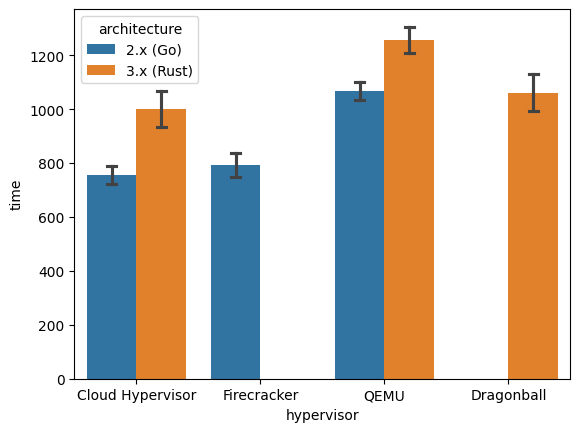

In [15]:
sns.barplot(data=kata_df, x="hypervisor", y="time", hue="architecture", errorbar="sd", capsize=0.15)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


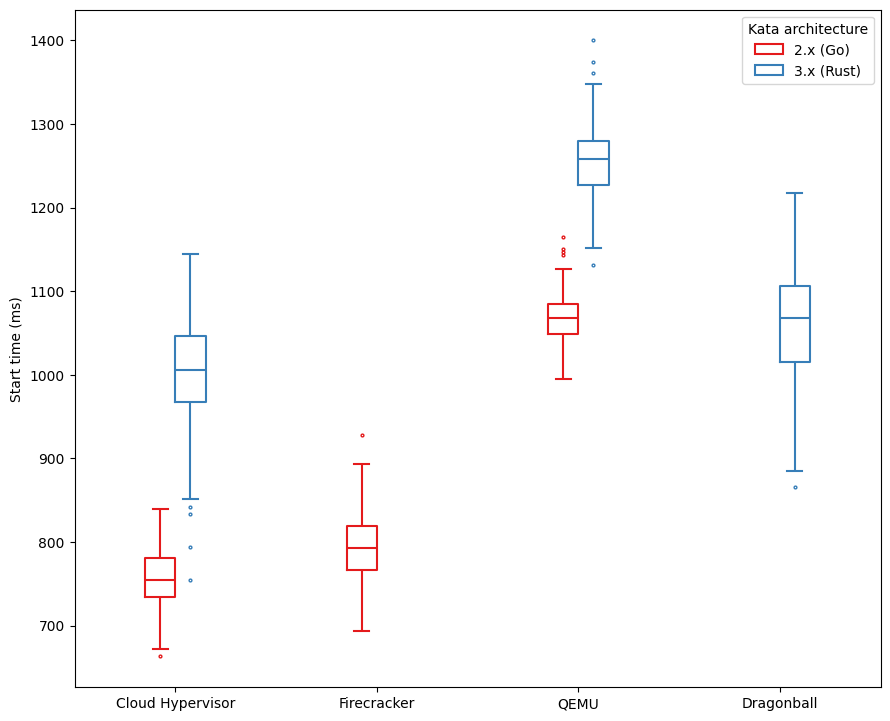

In [16]:
plt.figure(figsize=(10.4, 8.8))
ax = sns.boxplot(data=kata_df, x="hypervisor", y="time", hue="architecture", width=0.3, fliersize=2, fill=False, palette="Set1")
ax.set(ylabel="Start time (ms)", xlabel="")
ax.legend_.set_title("Kata architecture")

plt.savefig("start-kata_hypervisors_architecture.eps", format="eps", dpi=1200, bbox_inches="tight")

In [17]:
res_df.groupby("friendly_runtime")["time"].mean()

friendly_runtime
Kata (2.x, Cloud Hypervisor)     755.84
Kata (2.x, Firecracker)          793.13
Kata (2.x, QEMU)                1068.34
Kata (3.x, Cloud Hypervisor)    1001.48
Kata (3.x, Dragonball)           1061.5
Kata (3.x, QEMU)                1257.12
gVisor (KVM)                     589.63
gVisor (systrap)                 571.68
runc                             195.73
Name: time, dtype: object

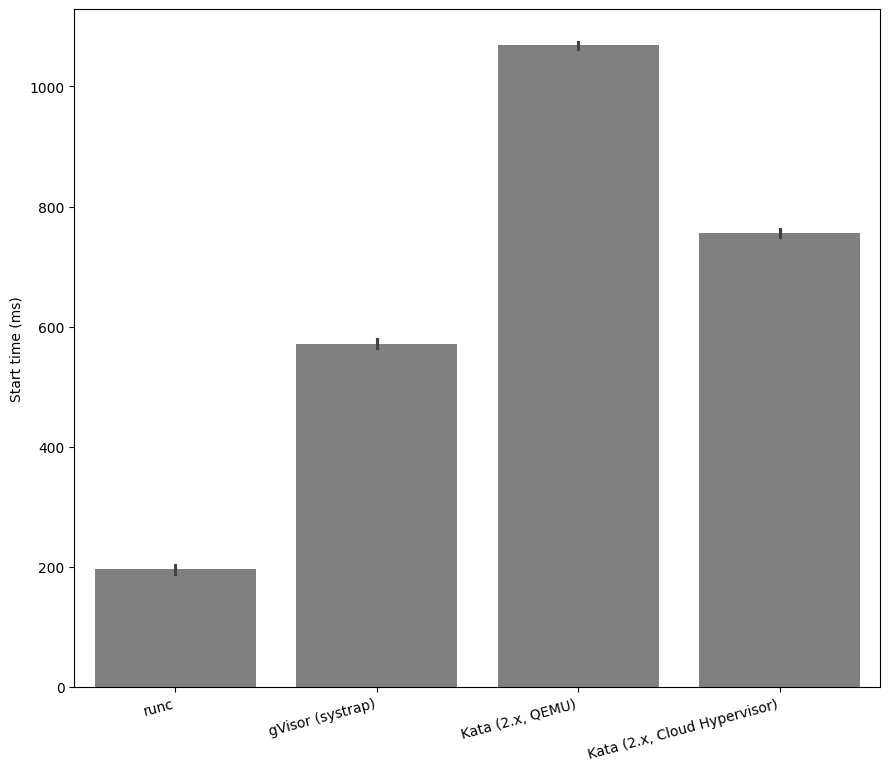

In [18]:
df_fastest = res_df.loc[(res_df["friendly_runtime"] == "runc") | (res_df["runtime"].str.contains("systrap")) | (res_df["runtime"].str.contains("kata2-cloud")) | (res_df["runtime"].str.contains("kata2-qemu"))]

plt.figure(figsize=(10.4, 8.8))
ax = sns.barplot(data=df_fastest, x="friendly_runtime", y="time", color="gray", order=[
    "runc",
    "gVisor (systrap)",
    "Kata (2.x, QEMU)",
    "Kata (2.x, Cloud Hypervisor)"
])
plt.xticks(rotation=15, horizontalalignment="right")
ax.set(xlabel="", ylabel="Start time (ms)")

plt.savefig("start-bar_overview.eps", format="eps", dpi=1200, bbox_inches="tight")